In [26]:
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np


sys.path.append("../src")


from plots_functions import (
    multiple_runs_with_uncertainty_band,
    multiple_runs_with_every_run,
)

In [27]:
experiment_dict = pickle.load(open("../results/general_parameters.pkl", "rb"))

for key, value in experiment_dict.items():
    print(f"key: {key}, value: {value}")

key: experiment name, value: general_parameters
key: experiments metadata, value: 
key: (10, 0.01), value: ([{'train_loss': [2.0201945304870605, 1.6059279441833496, 1.4587570428848267, 1.3886957168579102, 1.3484160900115967, 1.3210164308547974, 1.3022370338439941, 1.2924234867095947, 1.2785784006118774, 1.2706838846206665, 1.2673540115356445, 1.260712742805481, 1.2565417289733887, 1.2486871480941772, 1.2465837001800537, 1.2466298341751099, 1.2413995265960693, 1.235087275505066, 1.2270368337631226, 1.2263877391815186, 1.2252358198165894, 1.2176449298858643, 1.220053791999817, 1.2203381061553955, 1.2149187326431274, 1.214599609375, 1.2166683673858643, 1.21138334274292, 1.2087244987487793, 1.2107120752334595], 'train_acc': [24.16488983653163, 40.88152985074627, 46.95051528073916, 49.74013859275053, 51.01945628997868, 52.138859275053306, 52.86402807391613, 53.14054726368159, 53.72912224591329, 54.047841151385924, 54.420975479744136, 54.4887171286425, 54.657515991471215, 54.75857320540156, 

### Focus on time it took

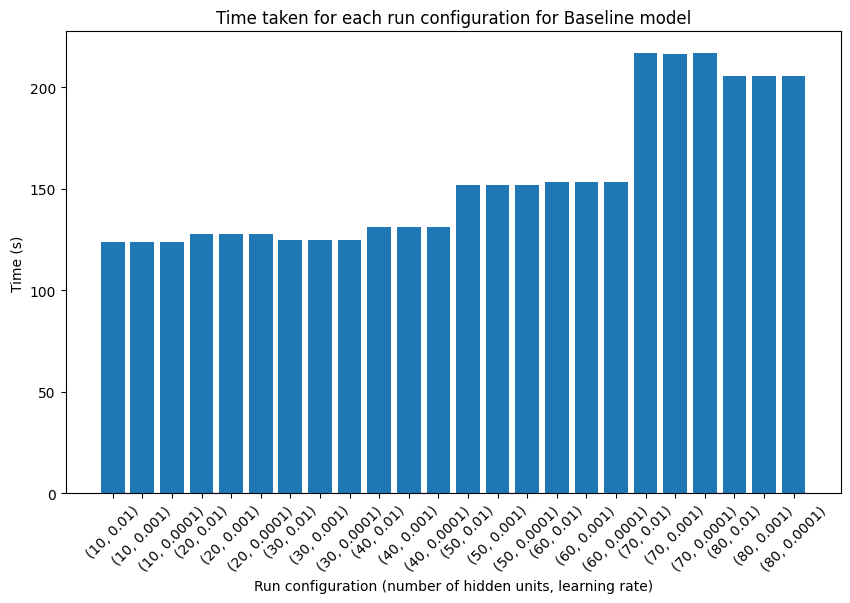

In [30]:
run_keys = []
time_values = []
number_of_parameters = []
for key, value in experiment_dict.items():
    if isinstance(value, tuple):
        run_keys.append(str(key))
        time_values.append(sum(value[1]) / len(value[1]))
        number_of_parameters.append(value[2])

# bar plot of time values
plt.figure(figsize=(10, 6))
plt.bar(run_keys, time_values)
plt.xlabel("Run configuration (number of hidden units, learning rate)")
plt.ylabel("Time (s)")
plt.title("Time taken for each run configuration for Baseline model")
plt.xticks(rotation=45)

plt.show()

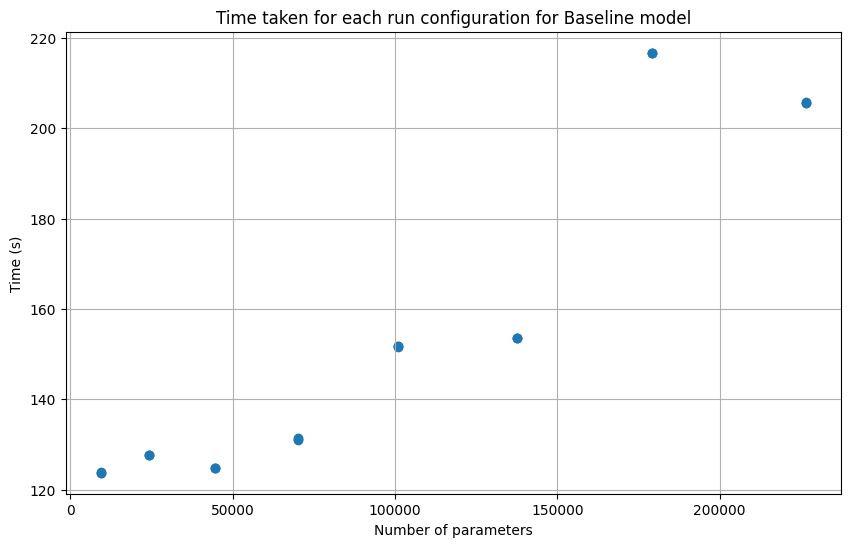

In [31]:
# plot number of parameters vs time
plt.figure(figsize=(10, 6))
plt.scatter(number_of_parameters, time_values)
plt.xlabel("Number of parameters")
plt.ylabel("Time (s)")
plt.title("Time taken for each run configuration for Baseline model")
plt.grid()
plt.show()

In [32]:
def companion_of_means_with_different_parameters(
    experiment_dict, title_accuracy, title_loss, plot_train=True, plot_test=True
):

    plt.figure(figsize=(10, 6))
    for key, metrics_list in experiment_dict.items():

        hidden_units, lr = key
        train_acc_list = [metrics["train_acc"] for metrics in metrics_list]
        test_acc_list = [metrics["test_acc"] for metrics in metrics_list]
        epochs = len(train_acc_list[0])
        num_of_runs = len(train_acc_list)

        avg_train_loss = np.mean(
            [metrics["train_acc"] for metrics in metrics_list], axis=0
        )
        if plot_train:
            plt.plot(
                range(epochs),
                avg_train_loss,
                label=f"Avg Train Accuracy with {hidden_units} hidden units and learning rate = {lr}",
                linestyle="-",
                linewidth=4,
            )

        avg_test_loss = np.mean(
            [metrics["test_acc"] for metrics in metrics_list], axis=0
        )
        if plot_test:
            plt.plot(
                range(epochs),
                avg_test_loss,
                label=f"Avg Test Accuracy with {hidden_units} hidden units and learning rate = {lr}",
                linestyle="-",
                linewidth=4,
            )

    # Add title, labels, grid, legend
    plt.title(title_accuracy)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)

    plt.show()

    plt.figure(figsize=(10, 6))

    for key, metrics_list in experiment_dict.items():
        hidden_units, lr = key
        train_loss_list = [metrics["train_loss"] for metrics in metrics_list]
        test_loss_list = [metrics["test_loss"] for metrics in metrics_list]
        epochs = len(train_loss_list[0])
        num_of_runs = len(train_loss_list)

        avg_train_loss = np.mean(
            [metrics["train_loss"] for metrics in metrics_list], axis=0
        )
        if plot_train:
            plt.plot(
                range(epochs),
                avg_train_loss,
                label=f"Avg Train Loss with {hidden_units} hidden units and learning rate = {lr}",
                linestyle="-",
                linewidth=4,
            )

        avg_test_loss = np.mean(
            [metrics["test_loss"] for metrics in metrics_list], axis=0
        )
        if plot_test:
            plt.plot(
                range(epochs),
                avg_test_loss,
                label=f"Avg Test Loss with {hidden_units} hidden units and learning rate = {lr}",
                linestyle="-",
                linewidth=4,
            )

    # Add title, labels, grid, legend
    plt.title(title_loss)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc="best")
    plt.grid(True)

    plt.show()

In [33]:
test_dict = {}
for key, value in experiment_dict.items():
    if isinstance(value, tuple):
        test_dict[key] = value[0]

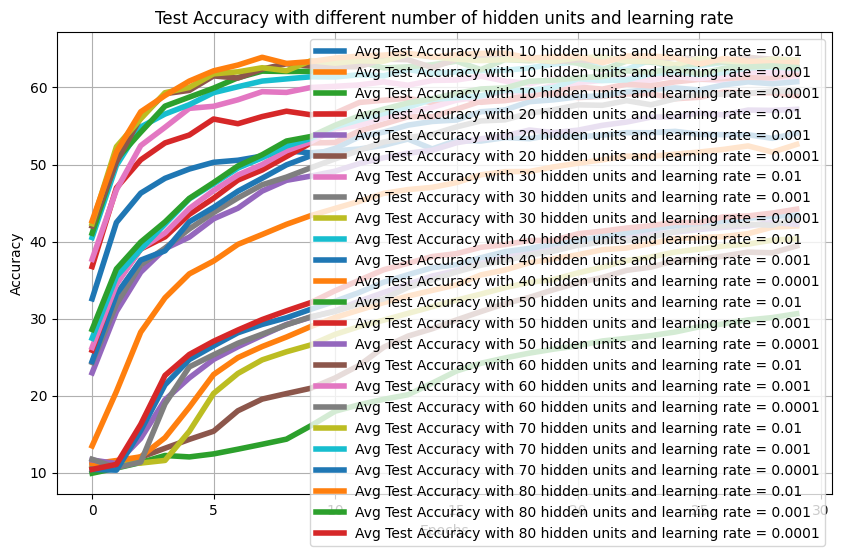

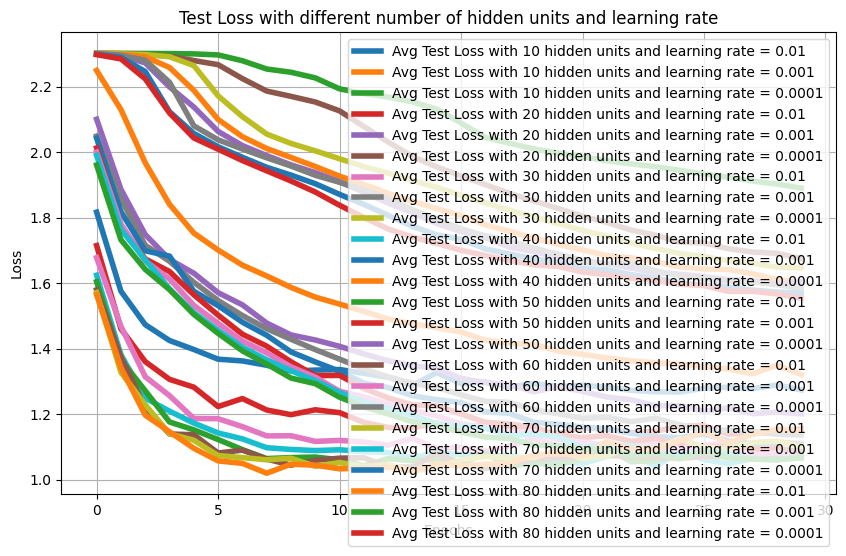

In [34]:
companion_of_means_with_different_parameters(
    test_dict,
    title_accuracy="Test Accuracy with different number of hidden units and learning rate",
    title_loss="Test Loss with different number of hidden units and learning rate",
    plot_train=False,
    plot_test=True,
)

In [ ]:
experiment_dict = pickle.load(open("../results/enhanced_model_time.pkl", "rb"))

for key, value in experiment_dict.items():
    print(f"key: {key}, value: {value}")